In [1]:
%load_ext autoreload
%autoreload 2


import sys
import healpy as hp
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
#import mxxl_real
import glob
from astropy.table import vstack,Table,join
from fa_tools import fa_plot
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask, scnd_mask
import pylab as pl
import S4Mock_io
import mock_ledger
from desimodel.footprint import is_point_in_desi, tiles2pix
from desitarget.geomask import pixarea2nside

In [18]:
mock_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/sv3mtl-bright-hp-*.ecsv')])

In [4]:
real_ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/S4MOCK/SV3REAL/SV3REALLEDGER/bright/sv3mtl-bright-hp-*.ecsv')])

In [5]:
"""
is_mws= ((whole_ledger['SV3_DESI_TARGET'].data & desi_mask['MWS_ANY']) != 0)
is_bgs= ((whole_ledger['SV3_DESI_TARGET'].data & desi_mask['BGS_ANY']) != 0)
mock_mws = whole_ledger[is_mws]
mock_bgs = whole_ledger[is_bgs]

is_mws= ((real_ledger['SV3_DESI_TARGET'].data & desi_mask['MWS_ANY']) != 0)
is_bgs= ((real_ledger['SV3_DESI_TARGET'].data & desi_mask['BGS_ANY']) != 0)
real_mws = real_ledger[is_mws]
real_bgs = real_ledger[is_bgs]
"""

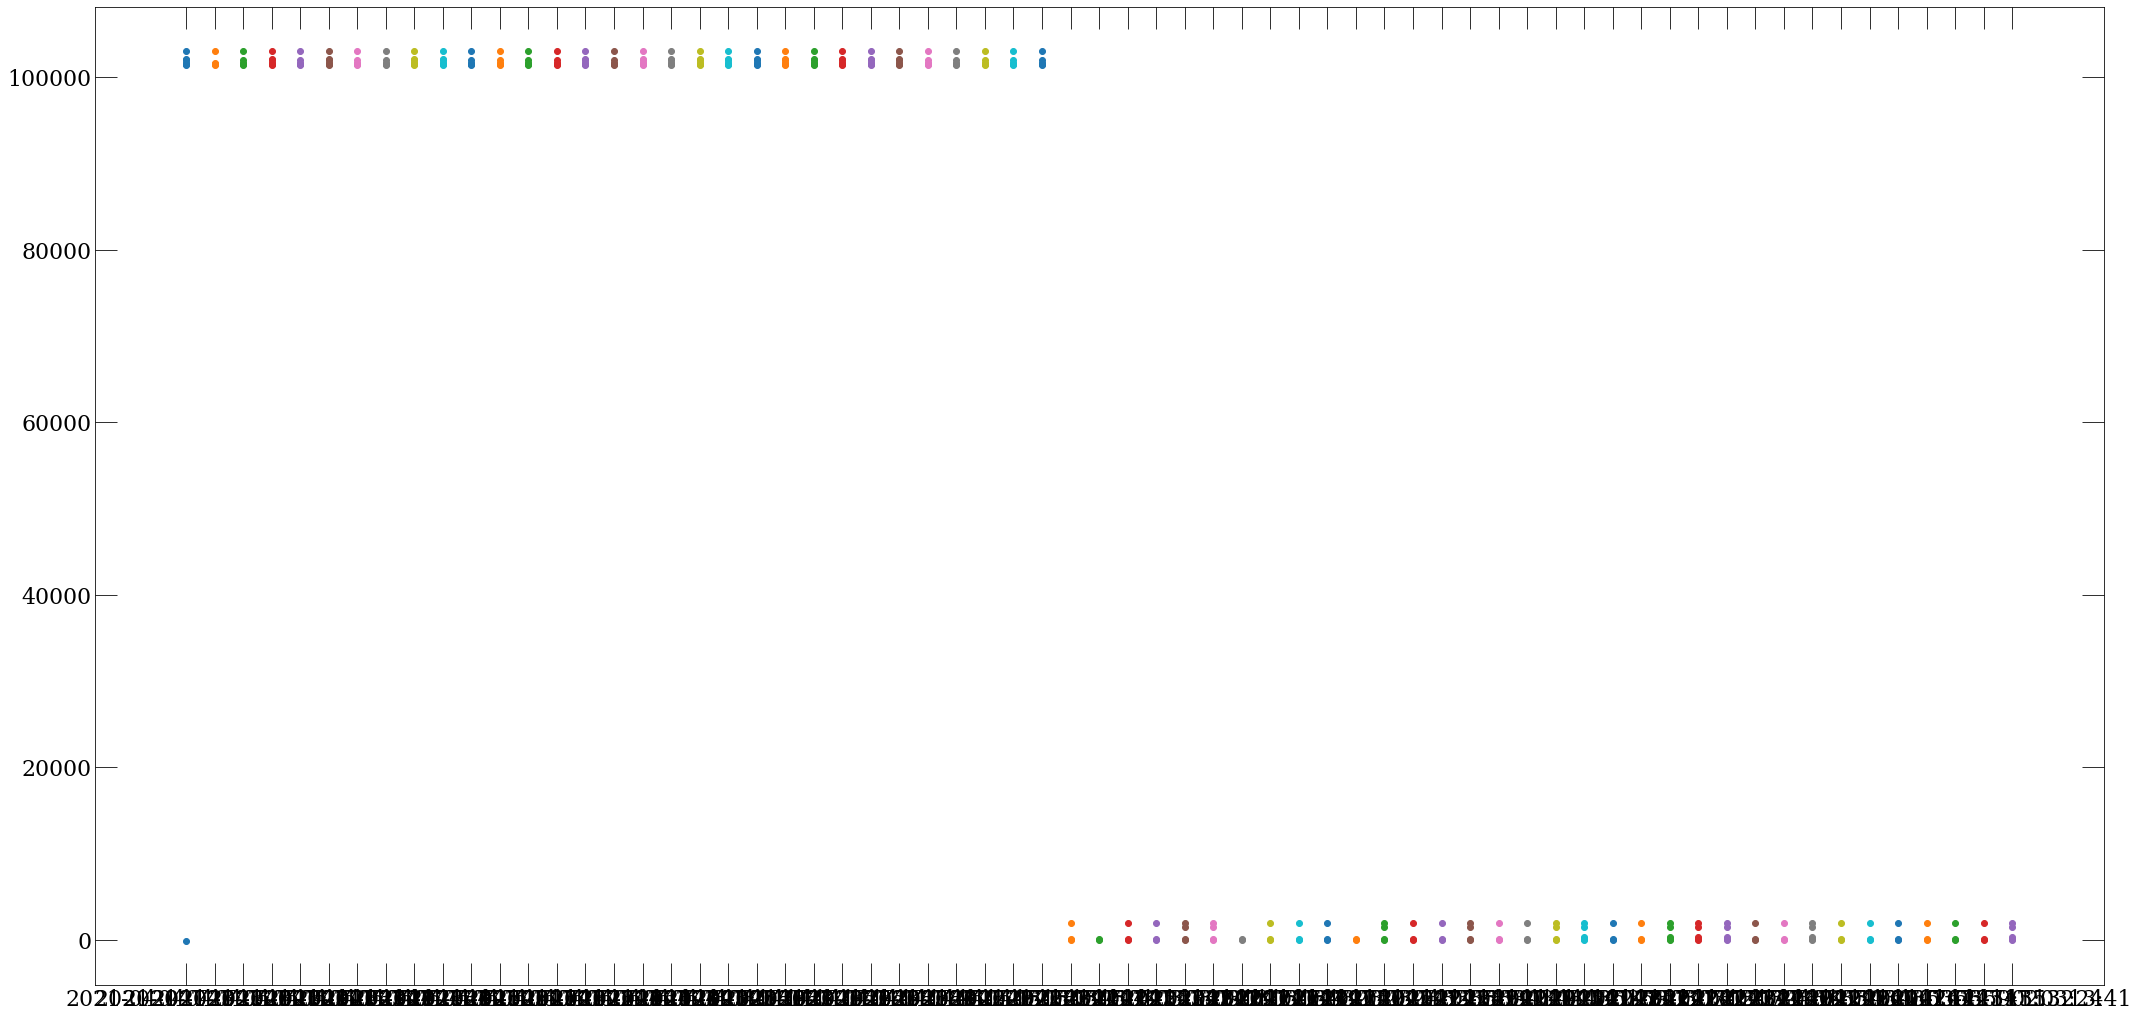

In [27]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(36,18))

dates = np.unique(mock_ledger['TIMESTAMP']).data

for i in range(len(dates)):
    mock = mock_ledger[(mock_ledger['TIMESTAMP']==dates[i])]
    plt.scatter([dates[i]]*len(np.unique(mock['PRIORITY']).data),np.unique(mock['PRIORITY']).data)

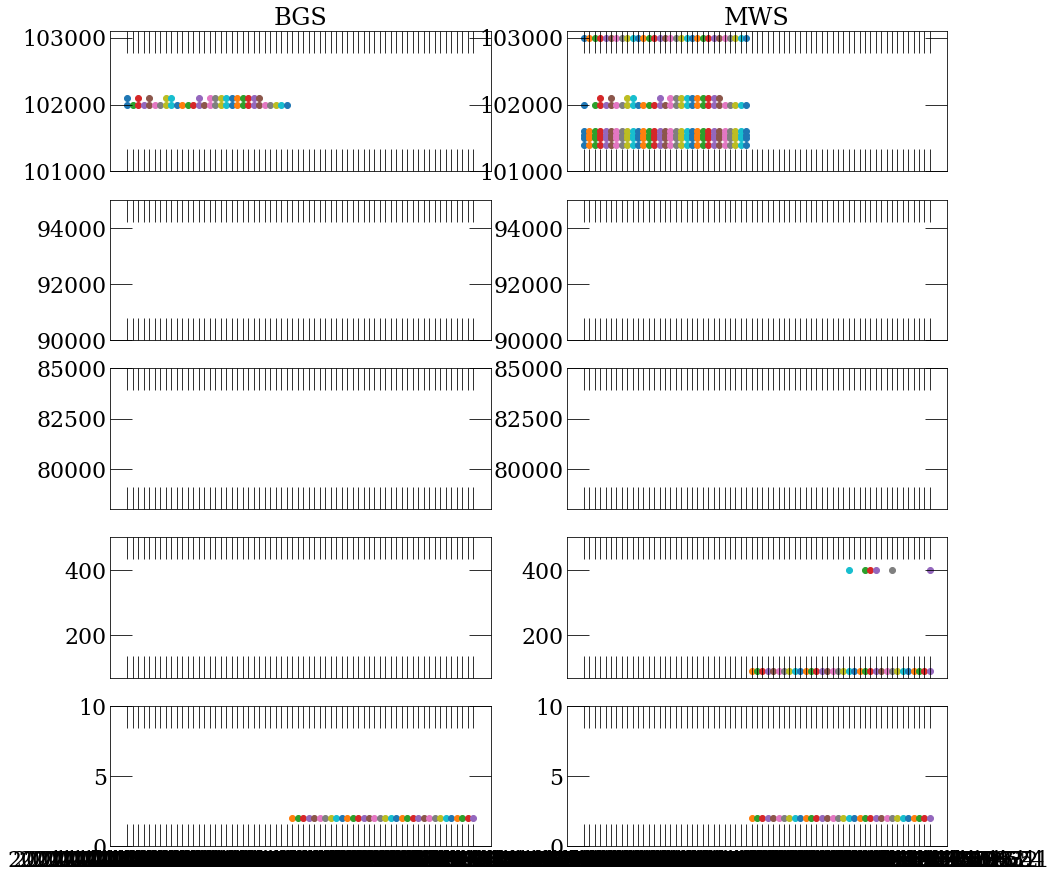

In [50]:
fig, axs = plt.subplots(5, 2,figsize=(15,15),sharex='col')
dates = np.unique(mock_ledger['TIMESTAMP']).data

for i in range(len(dates)):
    mock = mock_ledger[(mock_ledger['TIMESTAMP']==dates[i])]
    is_mws= ((mock['SV3_DESI_TARGET'].data & desi_mask['MWS_ANY']) != 0)
    is_bgs= ((mock['SV3_DESI_TARGET'].data & desi_mask['BGS_ANY']) != 0)
    mock_mws = mock[is_mws]
    mock_bgs = mock[is_bgs]
    
    axs[0,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[0,0].set_ylim(101000,103100)
    axs[0,0].set_title('BGS')
    
    axs[0,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[0,1].set_ylim(101000,103100)
    axs[0,1].set_title('MWS')
    
    axs[1,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[1,0].set_ylim(90000,95000)
    
    axs[1,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[1,1].set_ylim(90000,95000)
    
    axs[2,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[2,0].set_ylim(78000,85000)
    
    axs[2,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[2,1].set_ylim(78000,85000)
    
    axs[3,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[3,0].set_ylim(70,500)
    
    axs[3,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[3,1].set_ylim(70,500)
    
    axs[4,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[4,0].set_ylim(0,10)
    
    axs[4,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[4,1].set_ylim(0,10)
    
plt.savefig('mock_date_prior.png')

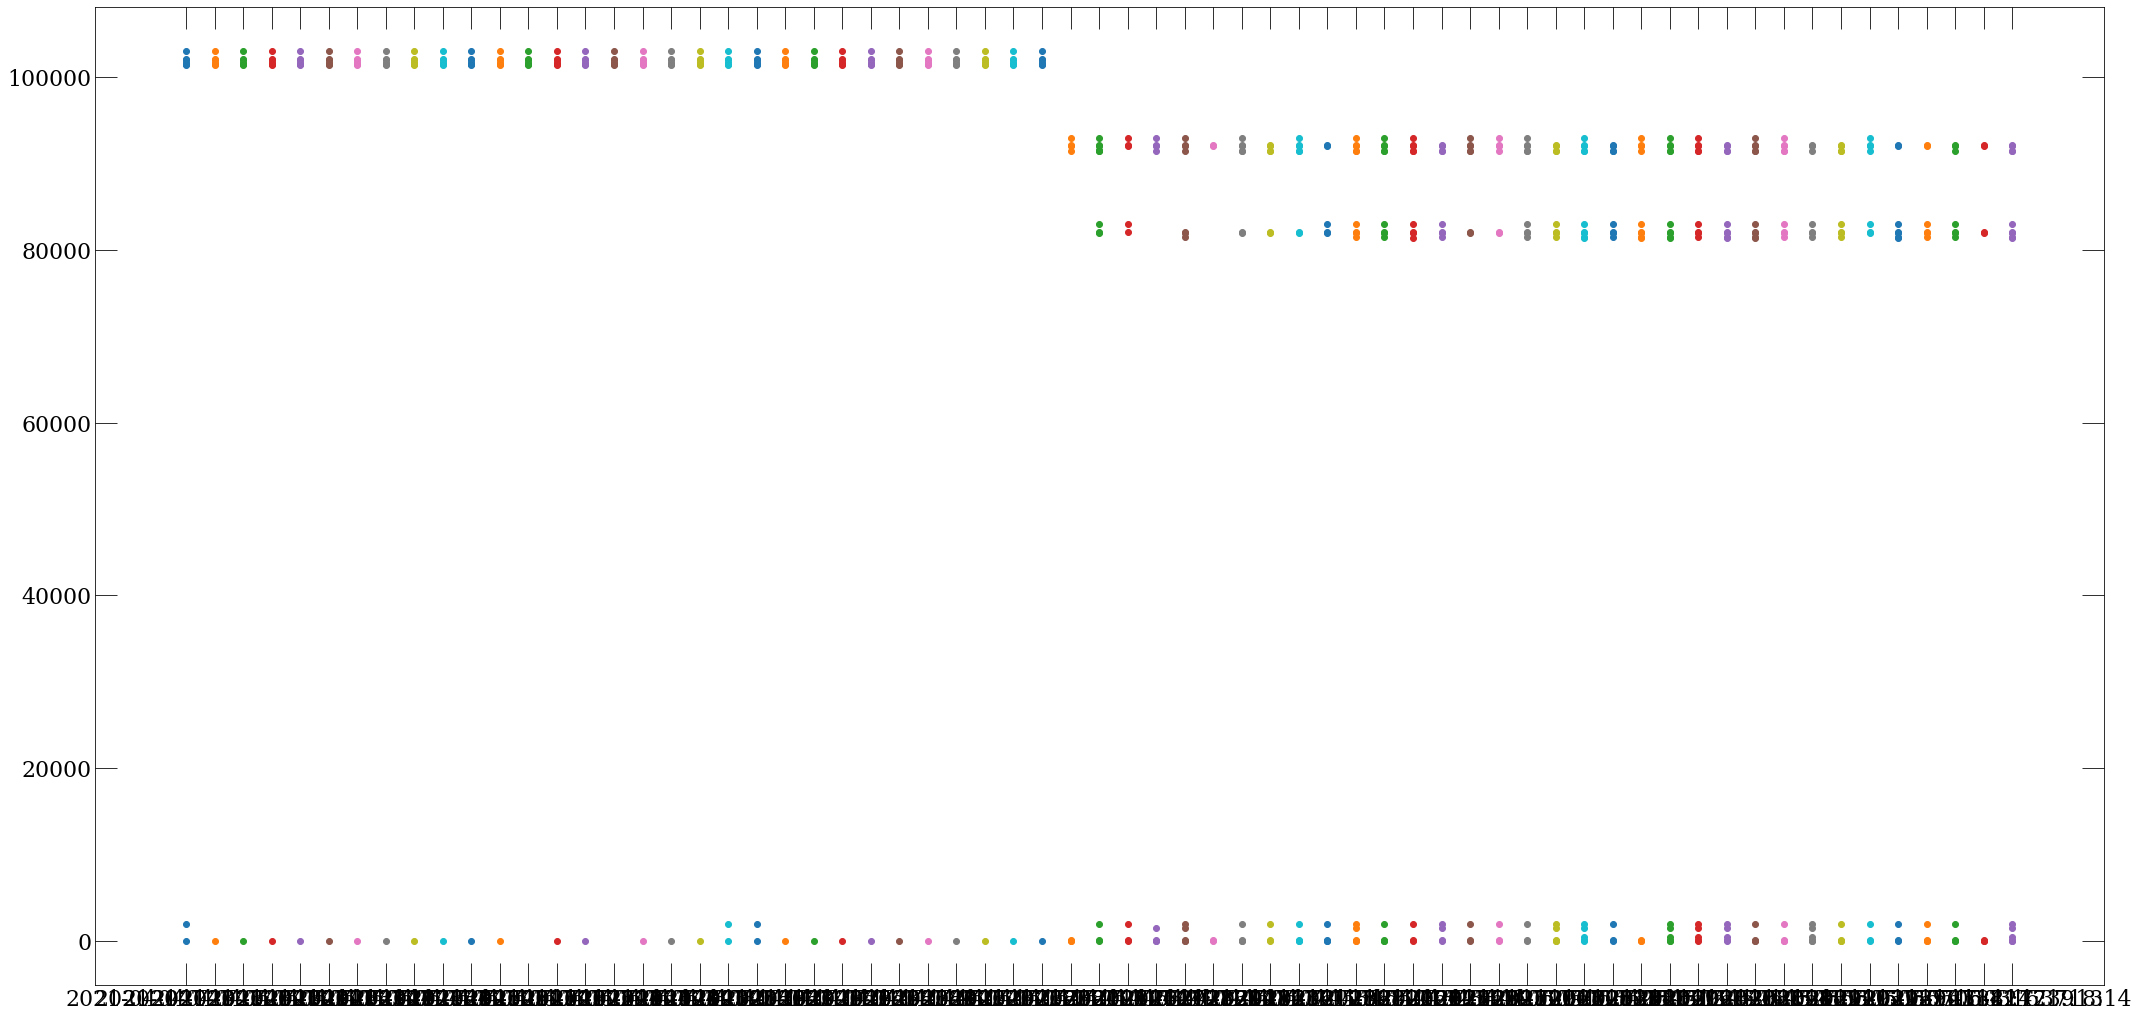

In [28]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(36,18))

dates = np.unique(real_ledger['TIMESTAMP']).data

for i in range(len(dates)):
    mock = real_ledger[(real_ledger['TIMESTAMP']==dates[i])]
    plt.scatter([dates[i]]*len(np.unique(mock['PRIORITY']).data),np.unique(mock['PRIORITY']).data)

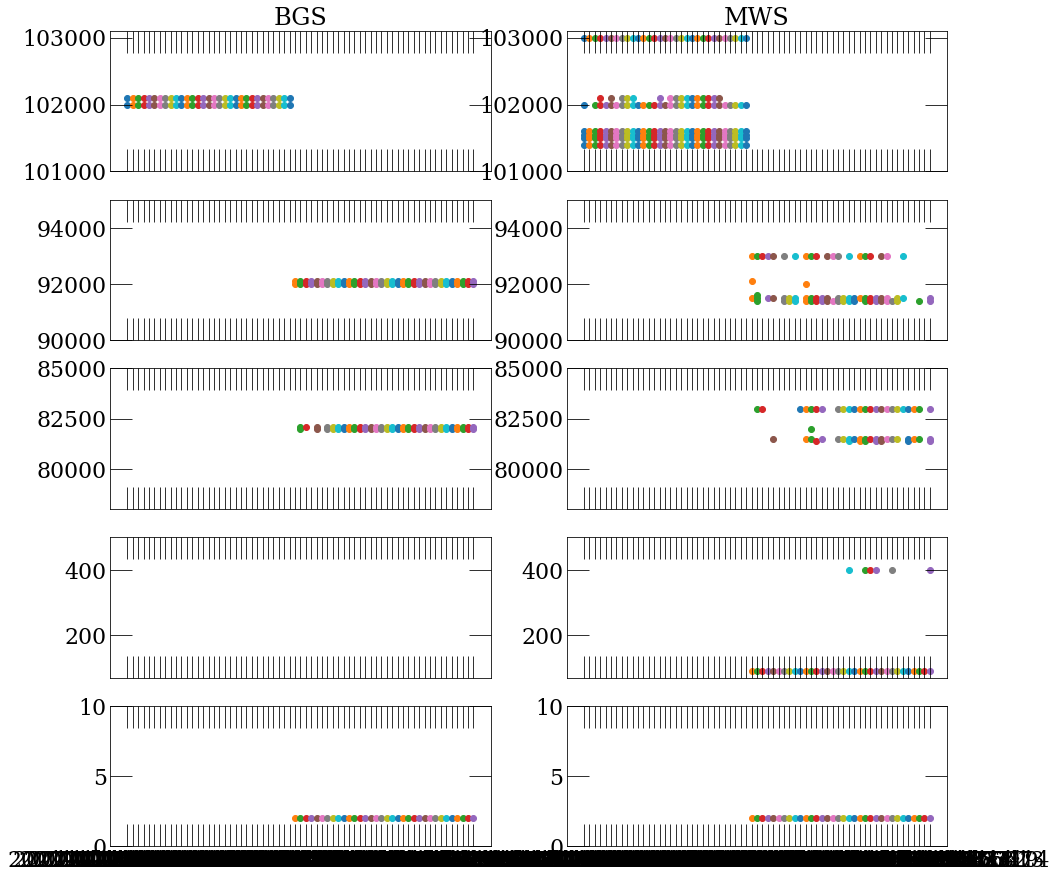

In [51]:
fig, axs = plt.subplots(5, 2,figsize=(15,15),sharex='col')
dates = np.unique(real_ledger['TIMESTAMP']).data

for i in range(len(dates)):
    mock = real_ledger[(real_ledger['TIMESTAMP']==dates[i])]
    is_mws= ((mock['SV3_DESI_TARGET'].data & desi_mask['MWS_ANY']) != 0)
    is_bgs= ((mock['SV3_DESI_TARGET'].data & desi_mask['BGS_ANY']) != 0)
    mock_mws = mock[is_mws]
    mock_bgs = mock[is_bgs]
    
    axs[0,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[0,0].set_ylim(101000,103100)
    axs[0,0].set_title('BGS')
    
    axs[0,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[0,1].set_ylim(101000,103100)
    axs[0,1].set_title('MWS')
    
    axs[1,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[1,0].set_ylim(90000,95000)
    
    axs[1,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[1,1].set_ylim(90000,95000)
    
    axs[2,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[2,0].set_ylim(78000,85000)
    
    axs[2,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[2,1].set_ylim(78000,85000)
    
    axs[3,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[3,0].set_ylim(70,500)
    
    axs[3,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[3,1].set_ylim(70,500)
    
    axs[4,0].scatter([dates[i]]*len(np.unique(mock_bgs['PRIORITY']).data),np.unique(mock_bgs['PRIORITY']).data)
    axs[4,0].set_ylim(0,10)
    
    axs[4,1].scatter([dates[i]]*len(np.unique(mock_mws['PRIORITY']).data),np.unique(mock_mws['PRIORITY']).data)
    axs[4,1].set_ylim(0,10)
    
plt.savefig('real_date_prior.png')

In [29]:
dates = np.unique(real_ledger['TIMESTAMP']).data
priorities = []
for i in range(len(dates)):
    mock = real_ledger[(real_ledger['TIMESTAMP']==dates[i])]
    priorities.append(np.unique(mock['PRIORITY']).data)

In [30]:
priorities

[array([     0,   1998, 101400, 101500, 101550, 101600, 102000, 102100,
        102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([101400, 101500, 101550, 101600, 102000, 102100, 102998]),
 array([     0, 101400, 101500